##Importing Libraries


In [ ]:
import numpy as np
import pandas as pd

##Reading the Data Files

In [ ]:
data=pd.read_excel('/content/gdp.xlsx')
data_1=pd.read_csv('/content/Influence of GDP - Sheet1.csv')

In [ ]:
data.head()

,Year,GDP Growth Rate,Number of Software Jobs Created,Number of Software Jobs Lost,Recession,Average Software Developer Salary
0,2000,0.031,100000,50000,No,"$100,000"
1,2001,0.004,50000,100000,Yes,"$90,000"
2,2002,0.018,100000,50000,No,"$85,000"
3,2003,0.025,150000,10000,No,"$90,000"
4,2004,0.030,120000,30000,No,"$95,000"


In [ ]:
data_1.head()

,year,india_gdp,Annual_change_india,Total_Youth_unemployed_percentage,Annual_change_unemployment,us_gdp,Annual_change_us,students_placed_btech,placed_percentage
0,2005,820.3816,7.9234,14.991,0.29,13039.20,3.4832,333.0,90
1,2006,940.2599,8.0607,15.742,0.75,13815.59,2.7828,353.0,92
2,2007,1216.7360,7.6608,16.495,0.75,14474.23,2.0105,320.0,96
3,2008,1198.8950,3.0867,17.143,0.65,14769.86,0.1222,252.0,99
4,2009,1341.8880,7.8619,18.098,0.95,14478.06,-2.5999,213.0,76


##Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
data[' Recession ']=e.fit_transform(data[' Recession '])

In [ ]:
data=data.loc[5:,:]


In [ ]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,GDP Growth Rate,Number of Software Jobs Created,Number of Software Jobs Lost,Recession
Year,1.000000,0.214142,0.047666,-0.365987,-0.131762
GDP Growth Rate,0.214142,1.000000,0.795223,-0.869709,-0.792508
Number of Software Jobs Created,0.047666,0.795223,1.000000,-0.813607,-0.698034
Number of Software Jobs Lost,-0.365987,-0.869709,-0.813607,1.000000,0.701034
Recession,-0.131762,-0.792508,-0.698034,0.701034,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##Correlation

<ipython-input-10-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

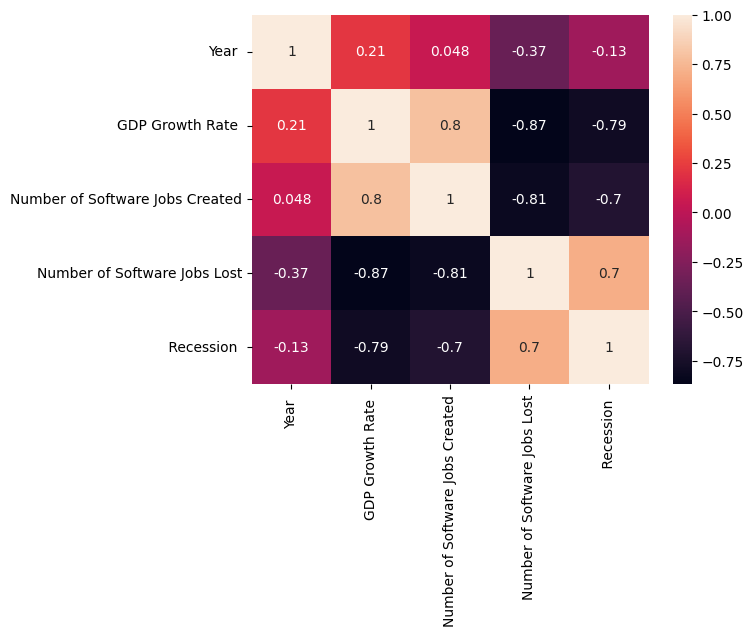

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
import matplotlib

##Comparition of GDP growth rate and jobs creater in each year

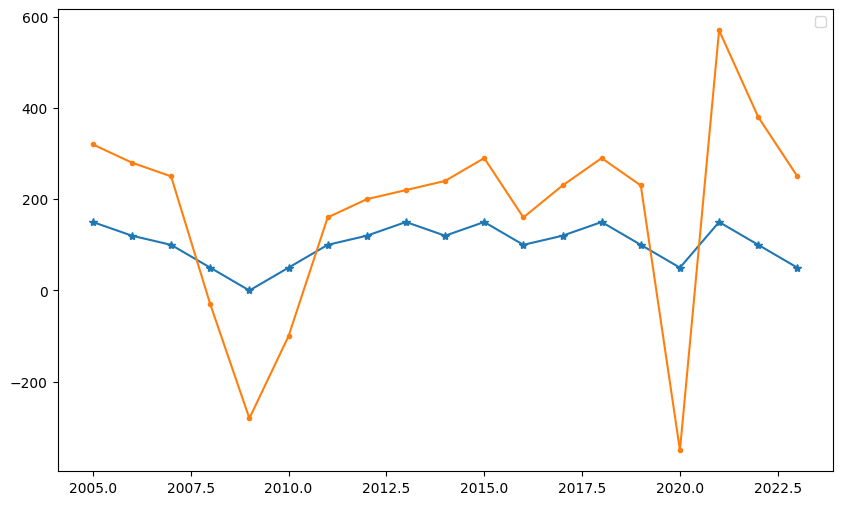

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year '],data['Number of Software Jobs Created']/1000,marker="*")
# plt.plot(data['Year '],data['Number of Software Jobs Lost'],marker='o')
plt.plot(data['Year '],data['GDP Growth Rate ']*10000,marker='.')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gdp_india_change = scaler.fit_transform([[x] for x in data['GDP Growth Rate ']])
jobs_created_change = scaler.fit_transform([[x] for x in data['Number of Software Jobs Created']])

In [ ]:
percentage_us = scaler.fit_transform([[x] for x in data_1['Annual_change_us']])

In [ ]:
percentage_placed = scaler.fit_transform([[x] for x in data_1['placed_percentage']])

In [ ]:
gdp_india_change

array([[0.72826087],
       [0.68478261],
       [0.65217391],
       [0.34782609],
       [0.07608696],
       [0.27173913],
       [0.55434783],
       [0.59782609],
       [0.61956522],
       [0.64130435],
       [0.69565217],
       [0.55434783],
       [0.63043478],
       [0.69565217],
       [0.63043478],
       [0.        ],
       [1.        ],
       [0.79347826],
       [0.65217391]])

In [ ]:
jobs_created_change

array([[1.        ],
       [0.8       ],
       [0.66666667],
       [0.33333333],
       [0.        ],
       [0.33333333],
       [0.66666667],
       [0.8       ],
       [1.        ],
       [0.8       ],
       [1.        ],
       [0.66666667],
       [0.8       ],
       [1.        ],
       [0.66666667],
       [0.33333333],
       [1.        ],
       [0.66666667],
       [0.33333333]])

In [ ]:
percentage_us

array([[0.71740902],
       [0.63702616],
       [0.54839154],
       [0.33167686],
       [0.01926939],
       [0.62854487],
       [0.49552982],
       [0.5794016 ],
       [0.52904181],
       [0.58021645],
       [0.62825795],
       [0.50902643],
       [0.57494864],
       [0.65568728],
       [0.58097391],
       [0.        ],
       [1.        ],
       [0.55425614]])

In [ ]:
percentage_placed

array([[0.60869565],
       [0.69565217],
       [0.86956522],
       [1.        ],
       [0.        ],
       [0.04347826],
       [0.56521739],
       [0.56521739],
       [0.2173913 ],
       [0.17391304],
       [0.43478261],
       [0.17391304],
       [0.47826087],
       [0.34782609],
       [0.60869565],
       [0.47826087],
       [0.2173913 ],
       [0.73913043]])

##Comparition of GDP change of india,us and jobs Created Change

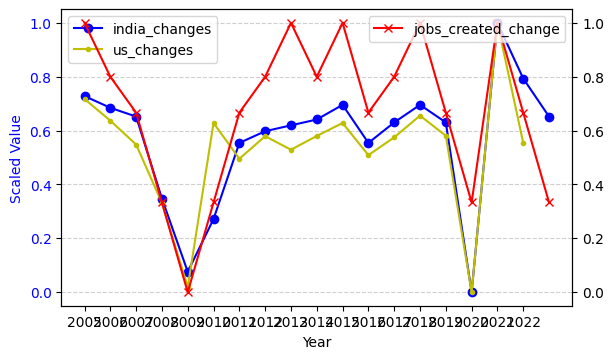

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_position([0.1, 0.1, 0.5, 1])
# Plot the scaled data
ax1.plot(gdp_india_change, color='b', marker='o', label='india_changes')
ax1.plot(percentage_us, color='y', marker='.', label='us_changes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Scaled Value', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax2 = ax1.twinx()

# Plot the scaled values on the secondary (right) axis
ax2.plot(jobs_created_change, color='r', marker='x', label='jobs_created_change')
# ax2.set_ylabel('Scaled Values', color='r')
# ax2.tick_params(axis='y', labelcolor='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set the x-axis labels
plt.xticks(range(len(gdp_india_change)-1), data_1.year)

# Show the plot
# plt.title('Scaled Percentage Changes vs. Scaled Values Over Time')
plt.tight_layout()
plt.show()


##Comparition of GDP change of india,us and placed Percentage

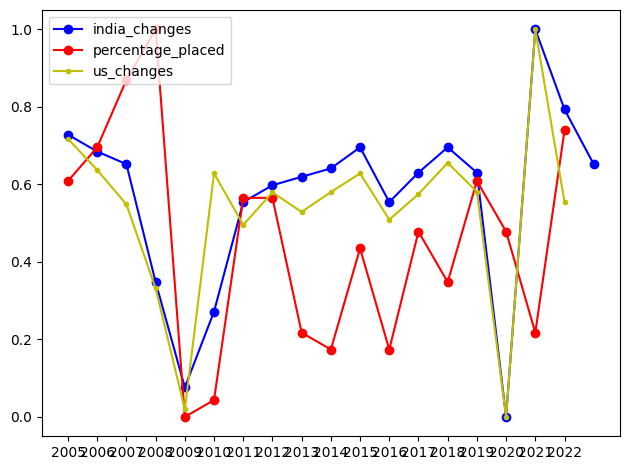

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(gdp_india_change, color='b', marker='o', label='india_changes')
ax1.plot(percentage_placed, color='r', marker='o', label='percentage_placed')
ax1.plot(percentage_us, color='y', marker='.', label='us_changes')
plt.xticks(range(len(gdp_india_change)-1), data_1.year)
plt.tight_layout()
ax1.legend(loc='upper left')
plt.show()

##Comparition of jobs Created, jobs lost through years

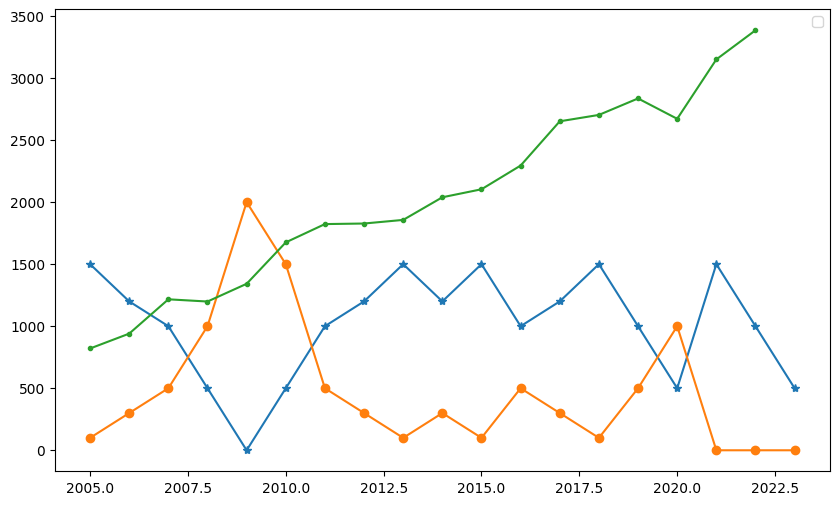

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year '],data['Number of Software Jobs Created']/100,marker="*")
plt.plot(data['Year '],data['Number of Software Jobs Lost']/100,marker='o')
plt.plot(data_1['year'],data_1.india_gdp,marker='.')
plt.legend()
plt.show()

##Impact of Recession on Jobs created each year

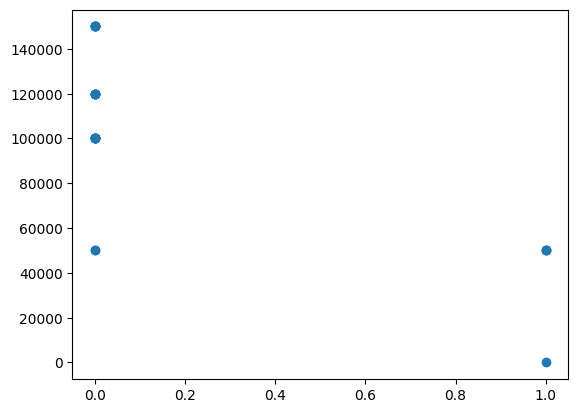

In [ ]:
plt.scatter(data[' Recession '],data['Number of Software Jobs Created'])

##Impact of recession of jobs lost

<BarContainer object of 24 artists>

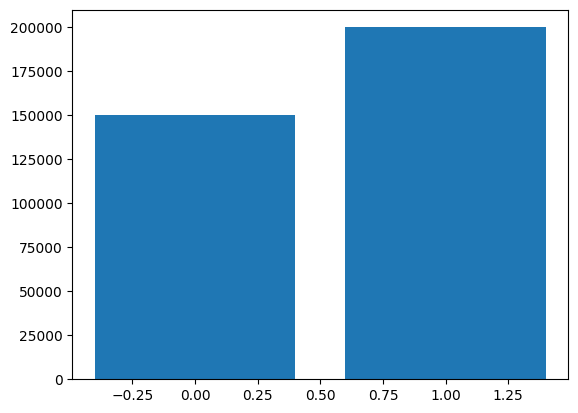

In [ ]:
plt.bar(data[' Recession '],data['Number of Software Jobs Lost'])

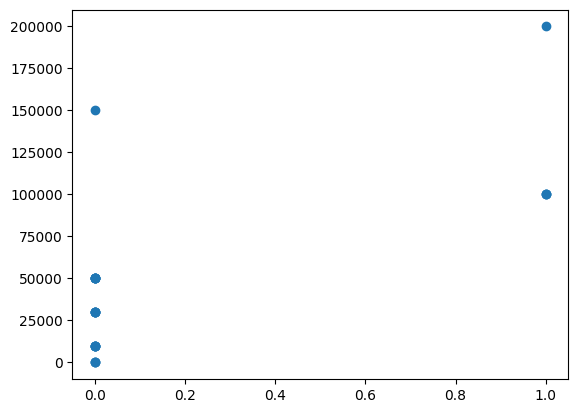

In [ ]:
plt.scatter(data[' Recession '],data['Number of Software Jobs Lost'])